In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor,Lasso, Ridge
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [7]:
df=pd.read_csv('/kaggle/input/car-price-prediction/car_price_prediction_.csv')

In [9]:
df.head(5)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


### **Drop unneeded columns**

In [12]:
df.drop(columns=['Car ID'],inplace = True)

In [18]:
df['Brand'].value_counts(normalize=True)*100


Brand
Toyota      14.96
Audi        14.72
BMW         14.32
Mercedes    14.12
Honda       14.08
Tesla       13.92
Ford        13.88
Name: proportion, dtype: float64

## **CHECK MISSING VALUES**

In [16]:
df.isnull().sum()

Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

**Bar chart**

<Axes: xlabel='Brand'>

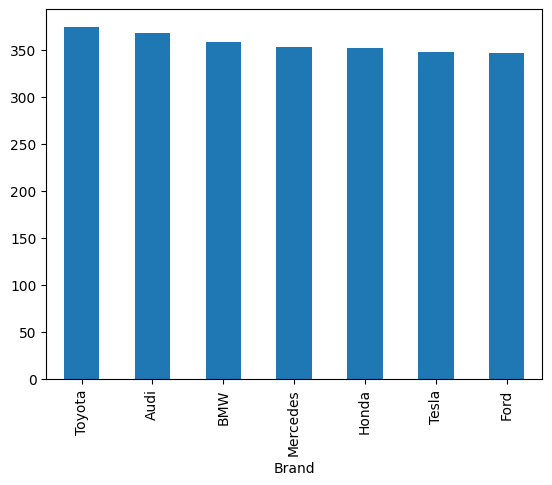

In [19]:
df['Brand'].value_counts().plot(kind='bar')

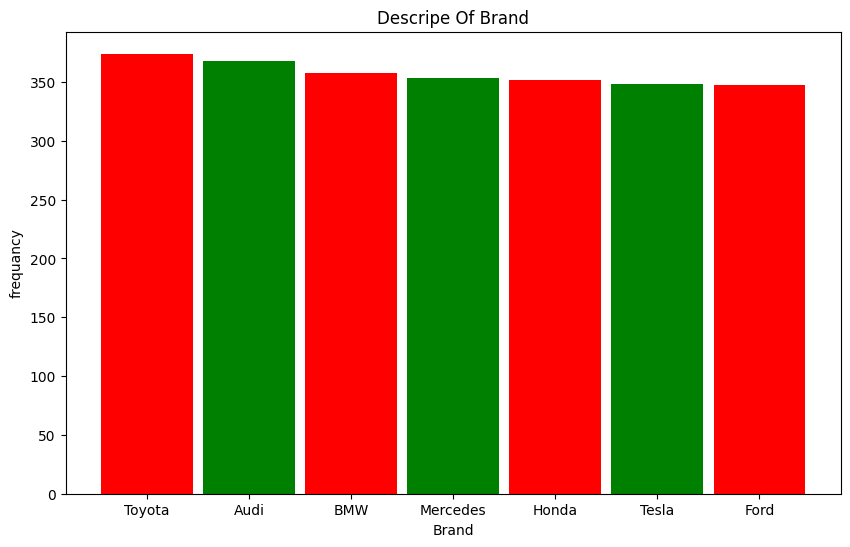

In [20]:
plt.figure(figsize=(10,6))
plt.bar(df['Brand'].value_counts().index , df['Brand'].value_counts().values , color=['red','green'] ,width=0.9,alpha=1)
plt.xlabel('Brand')
plt.ylabel('frequancy')
plt.title('Descripe Of Brand')
plt.show()

**Pie Chart**

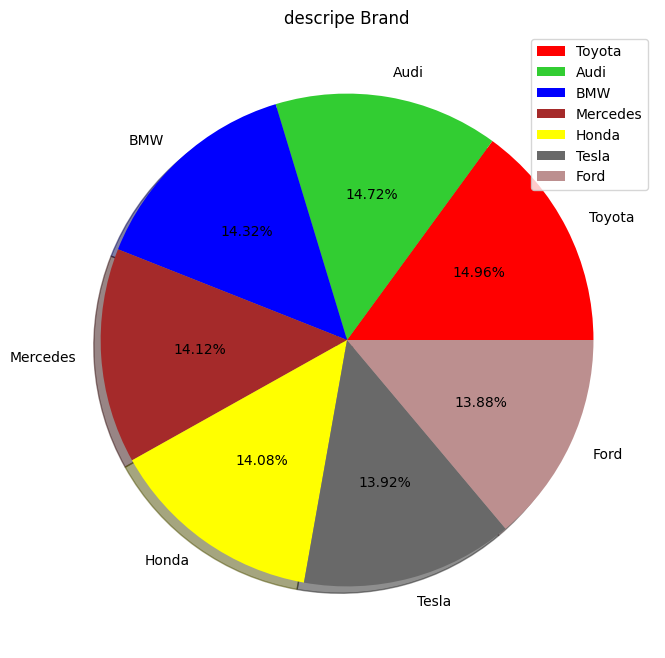

In [32]:
plt.figure(figsize=(10,8 ))
plt.pie(df['Brand'].value_counts().values,
        labels=df['Brand'].value_counts().index,
        colors=['red', 'limegreen','Blue','brown','yellow','dimgray','rosybrown'],
        shadow=True,
        autopct="%1.2f%%",
        )
plt.title('descripe Brand')
plt.legend()
plt.show()

In [33]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


**Year Columns**

In [35]:
df['Year'].value_counts()

Year
2020    122
2016    118
2003    118
2022    112
2021    112
2012    111
2007    110
2002    110
2001    109
2008    109
2014    109
2018    106
2023    103
2005    103
2019    103
2011    101
2004    100
2017     97
2010     95
2013     95
2000     93
2009     90
2015     88
2006     86
Name: count, dtype: int64

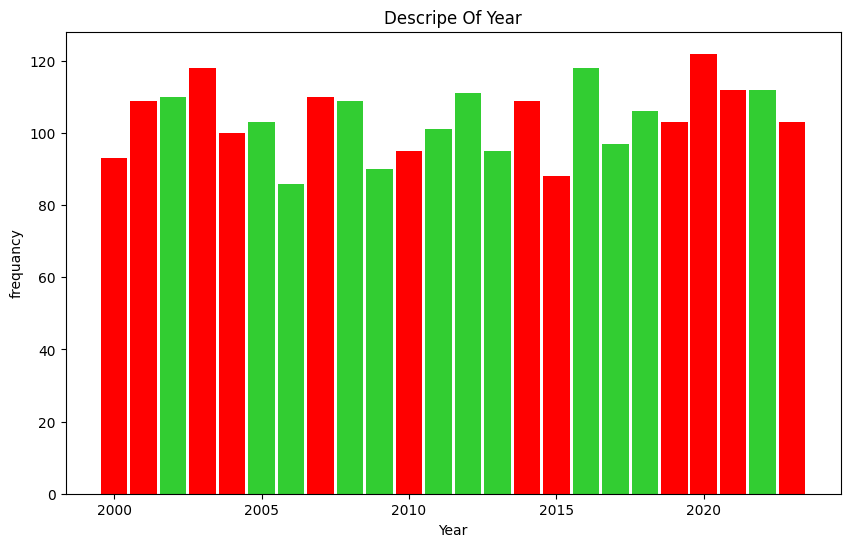

In [36]:
plt.figure(figsize=(10,6))
plt.bar(df['Year'].value_counts().index , df['Year'].value_counts().values , color=['red','Limegreen'] ,width=0.9,alpha=1)
plt.xlabel('Year')
plt.ylabel('frequancy')
plt.title('Descripe Of Year')
plt.show()

In [39]:
df[df['Year'] == 2020]['Brand'].value_counts()

Brand
Ford        21
BMW         20
Honda       20
Mercedes    18
Tesla       17
Audi        15
Toyota      11
Name: count, dtype: int64

In [43]:
years=df.groupby(['Year'])['Brand'].value_counts()
years

Year  Brand   
2000  Audi        20
      Mercedes    15
      Toyota      14
      Honda       13
      BMW         12
                  ..
2023  Honda       14
      Mercedes    14
      Tesla       14
      BMW         13
      Ford         9
Name: count, Length: 168, dtype: int64

In [44]:
type(years)

pandas.core.series.Series

**Data preprocessing**

In [46]:
df

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...
2495,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [47]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


**Define Features**

In [48]:
x=df.drop(columns=['Price'])
y=df['Price']

In [49]:
x

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang
...,...,...,...,...,...,...,...,...
2495,Audi,2020,2.4,Petrol,Automatic,22650,Like New,Q5
2496,Audi,2001,5.7,Hybrid,Manual,77701,Like New,A3
2497,Ford,2021,1.1,Hybrid,Manual,272827,Like New,Fiesta
2498,Audi,2002,4.5,Diesel,Manual,229164,Like New,Q5


In [50]:
y

0       26613.92
1       14679.61
2       44402.61
3       86374.33
4       73577.10
          ...   
2495    61384.10
2496    24710.35
2497    29902.45
2498    46085.67
2499    16594.14
Name: Price, Length: 2500, dtype: float64

**Data Encoding**

In [51]:
encoder = LabelEncoder()
df['Brand'] = encoder.fit_transform(df['Brand'])

In [52]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,5,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,1,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,0,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,5,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,2,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [53]:
encoder = LabelEncoder()
x['Brand'] = encoder.fit_transform(x['Brand'])

In [54]:
x

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,5,2016,2.3,Petrol,Manual,114832,New,Model X
1,1,2018,4.4,Electric,Manual,143190,Used,5 Series
2,0,2013,4.5,Electric,Manual,181601,New,A4
3,5,2011,4.1,Diesel,Automatic,68682,New,Model Y
4,2,2009,2.6,Diesel,Manual,223009,Like New,Mustang
...,...,...,...,...,...,...,...,...
2495,0,2020,2.4,Petrol,Automatic,22650,Like New,Q5
2496,0,2001,5.7,Hybrid,Manual,77701,Like New,A3
2497,2,2021,1.1,Hybrid,Manual,272827,Like New,Fiesta
2498,0,2002,4.5,Diesel,Manual,229164,Like New,Q5


In [55]:
x['Fuel Type'] = encoder.fit_transform(df['Fuel Type'])
x['Transmission'] = encoder.fit_transform(df['Transmission'])
x['Condition']  = encoder.fit_transform(df['Condition'])
x['Model'] = encoder.fit_transform(df['Model'])

In [56]:
x

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,5,2016,2.3,3,1,114832,1,19
1,1,2018,4.4,1,1,143190,2,1
2,0,2013,4.5,1,1,181601,1,3
3,5,2011,4.1,0,0,68682,1,20
4,2,2009,2.6,0,1,223009,0,21
...,...,...,...,...,...,...,...,...
2495,0,2020,2.4,3,0,22650,0,23
2496,0,2001,5.7,2,1,77701,0,2
2497,2,2021,1.1,2,1,272827,0,12
2498,0,2002,4.5,0,1,229164,0,23


In [57]:
scaler = MinMaxScaler()
x['Mileage'] = scaler.fit_transform(x[['Mileage']])

**Data splitting**

In [58]:
x_train , x_test , y_train ,y_test = train_test_split(x,y,train_size=0.8, shuffle=True, random_state=True)

In [59]:
x_train

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
918,4,2006,1.5,3,0,0.060003,2,5
1699,2,2004,1.5,1,0,0.977566,1,21
639,2,2010,2.4,0,1,0.734774,2,14
1002,2,2016,2.6,0,0,0.005514,1,12
1352,1,2022,1.5,2,0,0.540660,0,27
...,...,...,...,...,...,...,...,...
960,6,2001,4.7,3,1,0.520750,0,25
905,4,2003,4.5,3,0,0.279065,1,16
1096,2,2018,4.0,2,1,0.404438,1,21
235,2,2017,2.6,2,1,0.788419,1,14


**Data Modeling**

In [60]:
li=LinearRegression()
li.fit(x_train,y_train)

LinearRegression()

In [64]:
y_pred = li.predict(x_train)

In [66]:
sgd = SGDRegressor()
sgd.fit(x_train,y_train)

SGDRegressor()

In [67]:
y_pred = sgd.predict(x_test)